Data Calling from CSV

In [3]:
import pandas as pd
import numpy as np

In [32]:
dataframe = pd.read_csv("abalone.csv")

In [5]:
dataframe.head()

,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole-weight    4177 non-null   float64
 5   shucked-weight  4177 non-null   float64
 6   viscera-weight  4177 non-null   float64
 7   shell-weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
dataframe = dataframe.drop("sex", axis=1)

In [8]:
dataframe.head()

,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [9]:
x = dataframe.drop("rings", axis=1).copy()
y = dataframe['rings'].copy()

DATA PROCESSING for FIT

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.24, shuffle=True)
print("Train Shape {}".format(x_train.shape))
print("Test Shape {}".format(x_test.shape))
y_train.head(), y_test.head()

Train Shape (3174, 7)
Test Shape (1003, 7)


(403     10
 2015     8
 1573     8
 1570     7
 1385    11
 Name: rings, dtype: int64,
 3640     7
 4105     9
 2986    13
 3268    11
 2119     9
 Name: rings, dtype: int64)

Models of Regression

In [34]:
#MODULES
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR

lr = LinearRegression()
ri = Ridge(alpha=0.001, random_state=42)
la = Lasso(alpha=0.001, random_state=42)
en = ElasticNet(alpha=0.001, l1_ratio=0.001, random_state=42)
svr = SVR()

Fitting And Evaluation

In [37]:
models = [lr, ri, la, en, svr]
scores = []
r2_s = []
mse = []
cros_score = []
for model in models:
    model.fit(x_train, y_train)
    print("{} score {}".format(model,model.score(x_train, y_train)))
    y_pred = model.predict(x_test)
    print("{} r2 score {}".format(model, r2_score(y_true=y_test, y_pred=y_pred)))
    print("{} Mean Squred Error {}".format(model, mean_squared_error(y_test, y_pred)))
    scores.append(model.score(x_train, y_train)*100)
    r2_s.append(r2_score(y_true=y_test, y_pred=y_pred)*100)
    mse.append(mean_squared_error(y_test, y_pred))
    crvs = cross_val_score(model, x_test, y_test, cv=20)
    print("{} cross validation score {}".format(model, crvs.mean()))
    cros_score.append(crvs.mean())


LinearRegression() score 0.5368757626221856
LinearRegression() r2 score 0.4750904589311362
LinearRegression() Mean Squred Error 5.486634158742266
LinearRegression() cross validation score 0.4351662459181326
Ridge(alpha=0.001, random_state=42) score 0.5368757326471766
Ridge(alpha=0.001, random_state=42) r2 score 0.4752011229597345
Ridge(alpha=0.001, random_state=42) Mean Squred Error 5.485477439361219
Ridge(alpha=0.001, random_state=42) cross validation score 0.43549532706123684
Lasso(alpha=0.001, random_state=42) score 0.5359937164427968
Lasso(alpha=0.001, random_state=42) r2 score 0.48734060230727594
Lasso(alpha=0.001, random_state=42) Mean Squred Error 5.358589134145922
Lasso(alpha=0.001, random_state=42) cross validation score 0.4436583431312462
ElasticNet(alpha=0.001, l1_ratio=0.001, random_state=42) score 0.5161364238270392
ElasticNet(alpha=0.001, l1_ratio=0.001, random_state=42) r2 score 0.49181640618761646
ElasticNet(alpha=0.001, l1_ratio=0.001, random_state=42) Mean Squred Erro

Best Module and Ploting

No handles with labels found to put in legend.


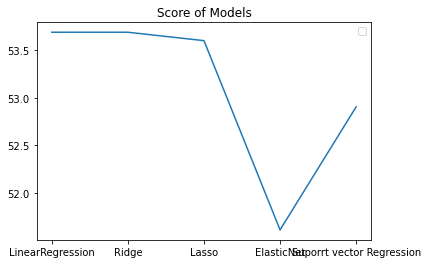

No handles with labels found to put in legend.


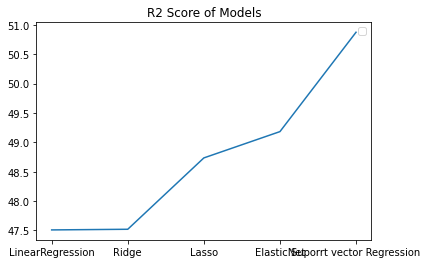

No handles with labels found to put in legend.


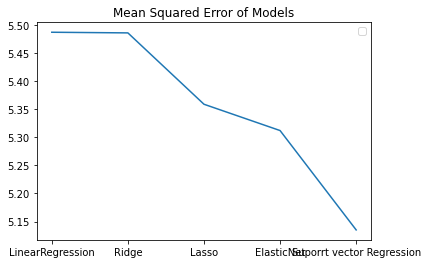

No handles with labels found to put in legend.


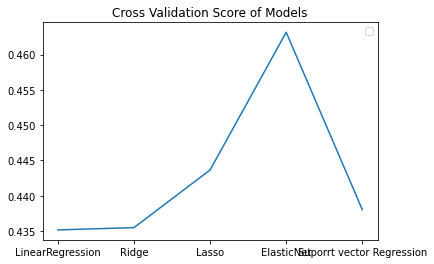

In [38]:
import matplotlib.pyplot as plt
mode = ["LinearRegression", "Ridge", "Lasso", "ElasticNet", "Suporrt vector Regression"]
plt.plot(mode, scores)
plt.title("Score of Models")
plt.legend()
plt.show()

plt.plot(mode, r2_s)
plt.title("R2 Score of Models")
plt.legend()
plt.show()

plt.plot(mode, mse)
plt.title("Mean Squared Error of Models")
plt.legend()
plt.show()

plt.plot(mode, cros_score)
plt.title("Cross Validation Score of Models")
plt.legend()
plt.show()

Model Save as joblib

In [39]:
from joblib import dump
dump(svr,"abalone_model_regressor.joblib")

['abalone_model_regressor.joblib']

In [31]:
from joblib import load
model = load("abalone_model_regressor.joblib")
data = x_train[500:501].copy()
model.predict(data), y_train[500:501]

(array([9.97020772]),
 852    10
 Name: rings, dtype: int64)